# Hadamard Test
Gary Hoppenworth


## Constructing $U(\theta)$
We will construct our unitary to be an orthonormal matrix that rotates the input by angle $2\pi\theta$ for $\theta \in [0, 1)$. 

In [0]:
import numpy as np
import math

def build_U(theta):
  sin_val = math.sin( 2 * math.pi * theta)
  cos_val = math.cos(2 * math.pi * theta)
  U = np.zeros((2, 2))
  U[0, 0] = cos_val
  U[1, 1] = cos_val
  U[0, 1] = sin_val
  U[1, 0] = -1 * sin_val
  return U

## Performing Hadamard Test

The function `perform_hadamard` will take as input an angle $\theta$, used to construct the unitary U. Then the Hadamard Test will be simulated and the resulting $Pr(0)$ will be calculated and returned.

In [0]:
def perform_hadamard(theta):
  #build unitary U
  U = build_U(theta)

  #define key constants
  ket_0 = np.array([1, 0])
  ket_1 = np.array([0, 1])
  H_coeff = 1.0 / math.sqrt(2)

  #|psi> is |0>
  psi = ket_0

  state = np.kron(ket_0, psi)

  state = H_coeff * np.kron(ket_0 + ket_1, psi)

  state = H_coeff * np.kron(ket_0, psi) + H_coeff * np.kron(ket_1, np.dot(U, psi))

  state = 0.5 * np.kron(ket_0 + ket_1, psi) + 0.5 * np.kron(ket_0 - ket_1, np.dot(U, psi))

  #this is |phi>
  phi = state

  #now we must calculate Pr(0) = || P|phi> || ^ 2
  P = np.zeros((2, 2))
  P[0, 0] = 1

  I = np.identity(2)

  P = np.kron(P, I)

  prob = np.dot(P, phi)

  final_prob = np.dot(prob, prob)

  return final_prob

## Sanity Check
We will use the formula we computed in class for the output of the Hadamard Test to quickly check the correctness of `perform_hadamard`.

The expected output is
$Pr(0) = \frac{1}{2}(1 + Re(<\psi | U | \psi >))$




### Test 1:   
$\theta = 0$


In [3]:
theta = 0

#hadamard function
print(perform_hadamard(theta))

1.0


In [4]:
#expected output
psi = np.array([1, 0])
U = build_U(theta)
expected_output = 0.5 * ( 1 + np.dot( np.dot(psi, U), psi ) )
print(expected_output)

1.0


### Test 2:   
$\theta = 0.5$


In [5]:
theta = 0.5

#hadamard function
print(perform_hadamard(theta))

3.749399456654644e-33


In [6]:
#expected output
psi = np.array([1, 0])
U = build_U(theta)
expected_output = 0.5 * ( 1 + np.dot( np.dot(psi, U), psi ) )
print(expected_output)

0.0


The `perform_hadamard` function appears to work correctly.

## Plotting the dependence of $Pr(0)$ on $\theta$

Text(0, 0.5, 'Probability of output 0')

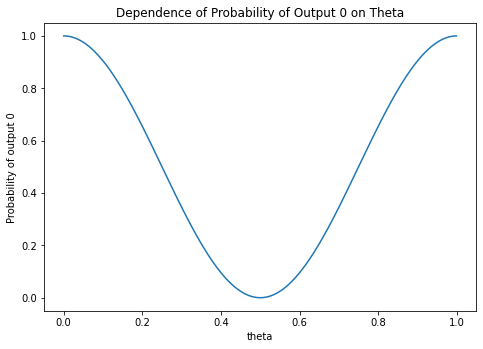

In [7]:
from matplotlib import pyplot as plt
X = np.arange(0, 1, 0.001)
Y = np.array([float(perform_hadamard(x)) for x in X.tolist()])
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(X, Y)
ax.set_title("Dependence of Probability of Output 0 on Theta")
ax.set_xlabel('theta')
ax.set_ylabel('Probability of output 0')

To be quite honest, I do not have the intuition to determine whether or not this looks correct.